#### ***Applied Graph Theory MidTerm Project (2019)***
# **Optimal Subway Cycle in Random Delaunay Graph Map**
## Solution) Genetic Algorithm 
## 1. Generate Delaunay Graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, distance
import scipy.sparse as sp
import networkx as nx
from collections import defaultdict

G = nx.Graph()  # Graph
N = 0			# The number of point
w = 0			# Threshold value ( vertex to cycle )
P = []          # Point [ [x1, y1], [x2, y2], ...]  list
C = []          # Cycle vertex [ v1, v2, .. ] list
C_sz = 0        # The number of Cycle vertex
C_length = 0    # The Length of Cycle
C_valid = 1     # Cycle validation
C_max_dist = 0  # The longest distance (v)->(cycle)
C_max_v = 0     # longest distance vertex
C_max_E = []    # longest distance path
CE_IN = []      # Cycle edge in DG
CE_OUT = []     # Cycle edge out of DG
R = 1000

city_f = open("city-080.txt",'r')
cycle_f = open("citycycle-080.txt", 'r')


# Read cycle data and check
C_sz = int(cycle_f.readline())
C = list(map(int, cycle_f.readline().split()))
if( C[0] != C[-1] or len(C[1:]) != len(set(C[1:])) ) :
    print("invalid cycle input")
    sys.exit()


# Read point data and check
N, w = map(int, city_f.readline().split())
for line in city_f :
    p = list(map(int, line.split()))
    if( p in P ) :
        print( "invalid point input")
        sys.exit()
    else : P.append( p )
    
P = np.array(P)
        
def make_delaunay_graph(G, coords, Range, Nodes):
        
    # for geometric graph
    node_pos = {}
    for idx, coord in enumerate(coords):
        node_pos[idx] = np.array([coord[0], coord[1]],dtype=int)
    tri = Delaunay(coords)
    edges = []
    
    dists = defaultdict(lambda: 0)
    for w,q in zip(tri.simplices, coords[tri.simplices]):
        
        def edge_preprocess(w1,w2,q1,q2):
            d = int(distance.euclidean(q1,q2) * 1000) / 1000
            edges.append([w1, w2, d])
            dists[(w1,w2)] = d
            dists[(w2,w1)] = d
            
        edge_preprocess(w[0],w[1],q[0],q[1])
        edge_preprocess(w[1],w[2],q[1],q[2])
        edge_preprocess(w[2],w[0],q[2],q[0])
    
    G.add_nodes_from(list(range(Nodes)))
    G.add_weighted_edges_from(edges)
        
    return G, node_pos, dists

def plot_graph(G, node_pos):
    plt.figure(figsize=(25, 25))
    nx.draw_networkx_nodes(G, node_pos, node_size=200,alpha=1,node_color='#000080')
    nx.draw_networkx_edges(G, node_pos, edgelist=G.edges, width=2, edge_color='#483D8B', alpha=0.3 ,style='dashed')
    nx.draw_networkx_labels(G, node_pos, font_size=11, font_family='sans-serif', alpha=1, font_color='white')
    nx.draw_networkx_edge_labels(G, node_pos, edge_labels=nx.get_edge_attributes(G,'weight'), font_color='black', font_size=11)
    plt.show()

G, pos, dists = make_delaunay_graph(G, P, Range=R, Nodes=N)
plot_graph(G,pos)

<Figure size 2500x2500 with 1 Axes>

In [2]:

# N = 100  # number of nodes  (in random graph)
# R = 1000 # coordinate range (in random graph)
# w = 100  # Threshold value  (vertex to cycle)

# def random_delaunay_graph(Range, Nodes):
#     G = nx.Graph()
#     x_coords = np.random.choice(Range, Nodes)
#     y_coords = np.random.choice(Range, Nodes)
#     coords = [[x,y] for x,y in zip(x_coords, y_coords)]
#     coords = np.array(coords)
    
#     # for geometric graph
#     node_pos = {}
#     for idx, coord in enumerate(coords):
#         node_pos[idx] = np.array([coord[0], coord[1]],dtype=int)
#     tri = Delaunay(coords)
#     edges = []
    
#     dists = defaultdict(lambda: 0)
#     for w,q in zip(tri.simplices, coords[tri.simplices]):
        
#         def edge_preprocess(w1,w2,q1,q2):
#             d = int(distance.euclidean(q1,q2) * 1000) / 1000
#             edges.append([w1, w2, d])
#             dists[(w1,w2)] = d
#             dists[(w2,w1)] = d
            
#         edge_preprocess(w[0],w[1],q[0],q[1])
#         edge_preprocess(w[1],w[2],q[1],q[2])
#         edge_preprocess(w[2],w[0],q[2],q[0])
    
#     G.add_nodes_from(list(range(Nodes)))
#     G.add_weighted_edges_from(edges)
        
#     return G, node_pos, dists

# def plot_graph(G, node_pos):
#     plt.figure(figsize=(17, 17))
#     nx.draw_networkx_nodes(G, node_pos, node_size=200,alpha=1,node_color='#000080')
#     nx.draw_networkx_edges(G, node_pos, edgelist=G.edges, width=2, edge_color='#483D8B', alpha=0.3 ,style='dashed')
#     nx.draw_networkx_labels(G, node_pos, font_size=11, font_family='sans-serif', alpha=1, font_color='white')
#     nx.draw_networkx_edge_labels(G, node_pos, edge_labels=nx.get_edge_attributes(G,'weight'), font_color='black', font_size=11)
#     plt.show()

# G, pos, dists = random_delaunay_graph(Range=R, Nodes=N)

## 2. Features of the generated graph G

X : (80, 2)


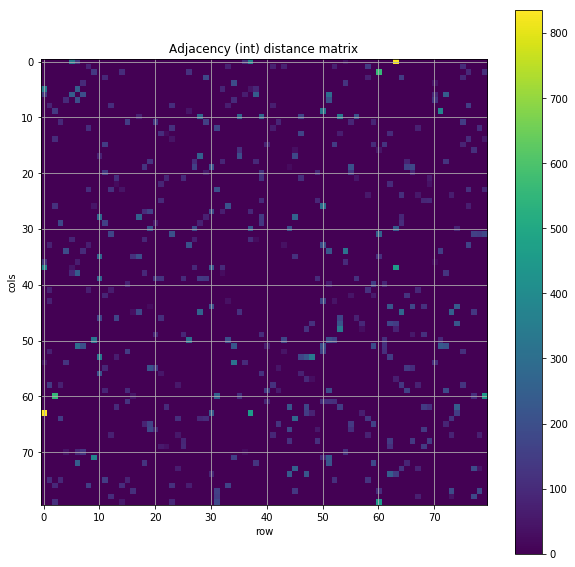

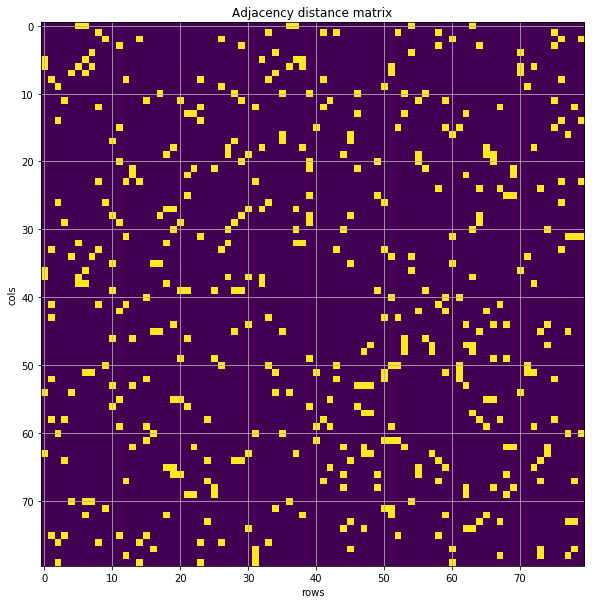

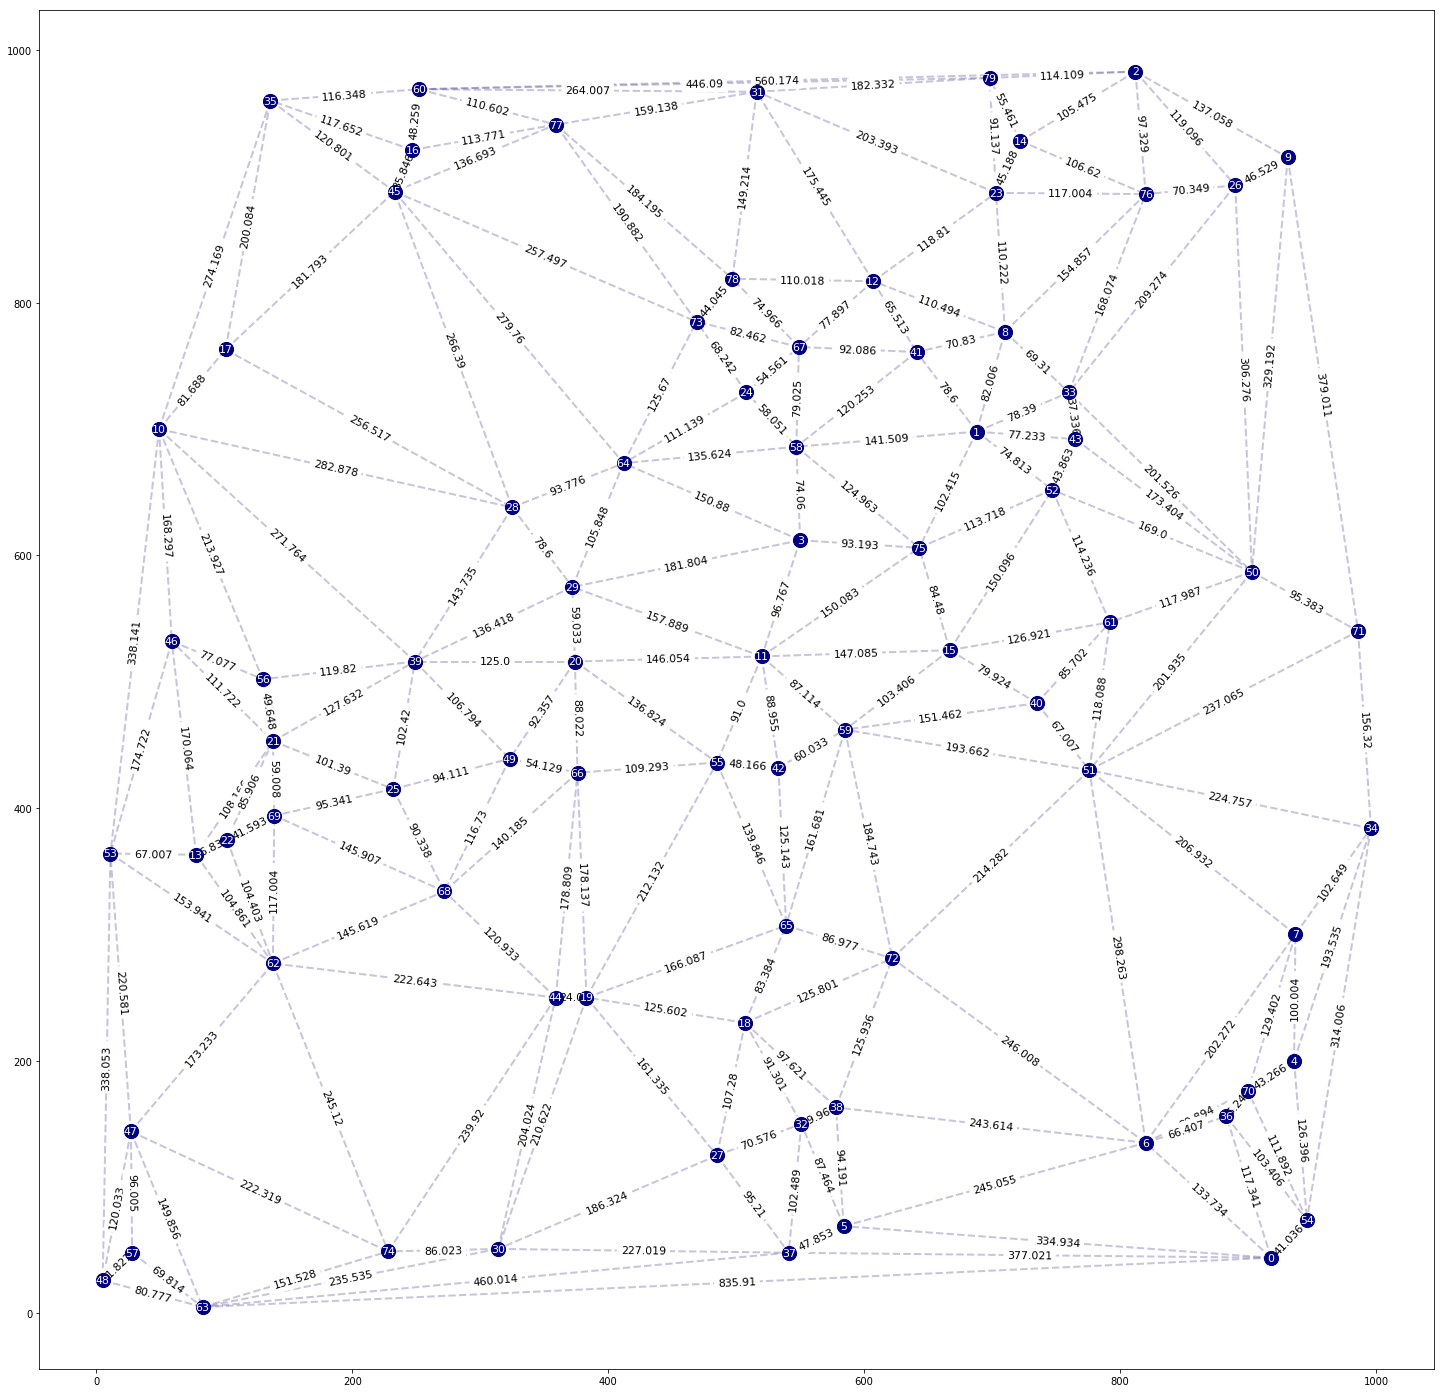

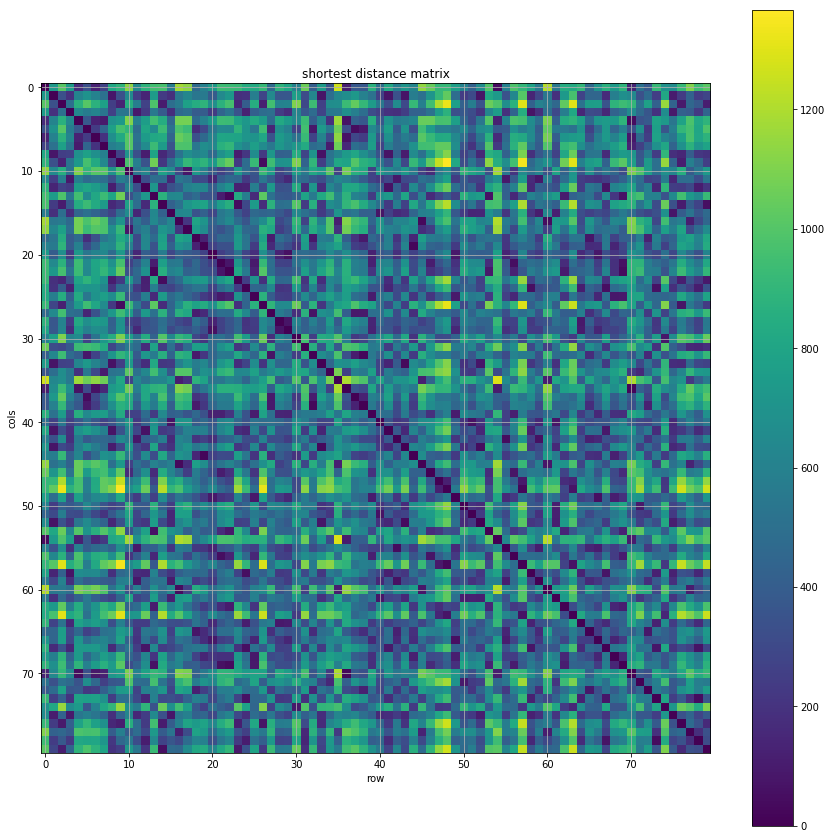

In [3]:
import time
import numpy as np
import scipy.sparse as sp

# Feature vector of each nodes. Features are the coordinates of nodes
def getFeatures(pos):
    X = np.array([v for k, v in pos.items()])
    print("X : {}".format(X.shape))
    return X

X = getFeatures(pos)

def getAdjacency(G,N,dists):
    edges = G.edges
    rows = []
    cols = []
    data = []
    for r,c in edges:
        rows.append(r)
        cols.append(c)
        data.append(dists[(r,c)])
    
    distmap = sp.coo_matrix((data,(rows,cols)),shape=(N,N))
    adj = distmap > 0
    
    distmap += distmap.T
    adj += adj.T
    return adj, distmap
    
A, D = getAdjacency(G, N, dists)
A = A.todense()
D = D.todense()

# # Remove duplicated
for i in range(N):
    for j in range(N):
        if A[i,j] == 2:
            D[i,j] /= 2
            A[i,j] = 1

# Visualization for debugging
def plot_matrix(mat, title, xlabel, ylabel, size, colorbar=True, cmap="RdBu", inText=False):
    plt.figure(figsize=size)
    ax = plt.subplot(1,1,1)
    plt.imshow(mat, cmap=cmap)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)
    N = len(mat)
    
    if inText:
        for i in range(N):
            for j in range(N):
                text = ax.text(j, i, mat[i, j], ha="center", va="center", color="w")   
    
    if colorbar:
        plt.colorbar()
        
    plt.show()

D_int = D.astype(int)
plot_matrix(D_int, title="Adjacency (int) distance matrix", xlabel="row", ylabel="cols", size=(10,10), colorbar=True,  cmap="viridis")
plot_matrix(A, title="Adjacency distance matrix", xlabel="rows", ylabel="cols", size=(10,10), colorbar=False, cmap="viridis")
plot_graph(G, pos)

nodes = G.nodes
path_table = dict(nx.all_pairs_dijkstra_path_length(G))
P = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        P[i,j] = int(path_table[i][j])
        
plot_matrix(P, title="shortest distance matrix", xlabel="row", ylabel="cols", size=(15,15), colorbar=True,  cmap="viridis")

## 3. Random Circle drawing 

### 3.1 Threshold Area Circle Drawing with ConcaveHull

In [4]:
from concavehull import concaveHull
# Concave Hull version
# make random particles for random circle generation
all_path = dict(nx.all_pairs_dijkstra_path(G))
epochs = 100000
cols = 1
MIN_CYCLE_LENGTH = -1

def get_cycle_score(individual):
    
    node_pos = pos
    figsize = (10,10)
    
    # Preprocessing
    pos_node = {}
    points = []

    for i, n in enumerate(individual):
        if n == 1:
            points.append(node_pos[i])
            pos_node[tuple(node_pos[i])] = i

    points = np.array(points)
        
    if len(points) < 3:
        return [0]
    
    
    # A1) Add more points , ex. nodes in each node's shortest path
    
    
    
    
    hull = concaveHull(points, k=3)
    hull_nodes = [pos_node[tuple(h)] for h in hull]
    if hull_nodes[0] != hull_nodes[-1]:
        return [0]

    hull_edges = []
    for i in range(len(hull_nodes)-1):
        hull_edges.append((hull_nodes[i], hull_nodes[i+1]))


    # Cycle tester
    cycle_visit = defaultdict(lambda: 0)
    cycle_nodes = []
    all_shortest_path_edges = []
    for n0, n1 in hull_edges:
        shortest_path = all_path[n0][n1]
        shortest_path_edges = []


        for i in range(len(shortest_path)-1):
            cycle_nodes.append(shortest_path[i])
            shortest_path_edges.append((shortest_path[i], shortest_path[i+1]))
            cycle_visit[shortest_path[i+1]] += 1

        cycle_visit[shortest_path[0]]  = 1
        cycle_visit[shortest_path[-1]] = 1
        cycle_nodes.append(shortest_path[-1])      

        # Drawing part
        all_shortest_path_edges += shortest_path_edges


    # 1. Is this true cycle?
    isCycle = True

    for k,v in cycle_visit.items():
        if v > 1: # duplicate visited node exist in cycle path
            isCycle = False


    # 2. all cycle nodes in 'w' threshold?
    cycle_nodes = list(set(cycle_nodes))

    isThres = True
    for i in range(P.shape[0]):
        inThres = False
        for cn in cycle_nodes:
            if P[i,cn] < w:
                inThres = True
                break

        if not inThres:
            isThres = False
            break


    # 3. Calculate length of Cycle
    cycle_length = 0
    for start, end in all_shortest_path_edges:
        cycle_length += P[start, end]
    
    if (cycle_length > 0) and isCycle and isThres:
        
        #plt.figure(figsize=figsize)
        #nx.draw_networkx_nodes(G, node_pos, node_size=200,alpha=1,node_color='#000080')
        #nx.draw_networkx_edges(G, node_pos, edgelist=G.edges, width=2, edge_color='#483D8B', alpha=0.2 ,style='dashed')
        #nx.draw_networkx_labels(G, node_pos, font_size=11, font_family='sans-serif', alpha=1, font_color='white')
        #nx.draw_networkx_edge_labels(G, node_pos, edge_labels=nx.get_edge_attributes(G,'weight'), font_color='black', font_size=11, bbox=dict(facecolor='white', alpha=0.001))
        #nx.draw_networkx_edges(G, node_pos, edgelist = all_shortest_path_edges, width=2, edge_color='r', alpha=0.9 ,style='dashed')
        #plt.title("Correct Cycle - LENGTH : {} / W : {}".format(cycle_length, w))
        #plt.show()
        return [1/cycle_length]
    else:
        #print("Wrong Cycle")
        return [0]

In [5]:
# EXAMPLE - RANDOM nodes
#number_of_random_nodes = np.random.randint(5, 15)
#selected_nodes = list(set(np.random.choice(N, number_of_random_nodes)))

# EXAMPLE2 - G.A input
import random
from deap import creator, base, tools, algorithms
import multiprocessing



length_of_gene = N
creator.create("FitnessMax", base.Fitness, weights=[1.0])
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
pool = multiprocessing.Pool()
toolbox.register("map", pool.map)
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n = length_of_gene)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", get_cycle_score)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=20)

population = toolbox.population(n=200)

NGEN=1000
for gen in range(NGEN):
    if gen % 10 == 0:
        print("Generation[{}]...".format(gen))
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.3, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring) # evaluation function and arguments ?
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

best_score = tools.selBest(population, k=10)
print(best_score)

Generation[0]...
Generation[10]...
Generation[20]...
Generation[30]...
Generation[40]...
Generation[50]...
Generation[60]...
Generation[70]...
Generation[80]...
Generation[90]...
Generation[100]...
Generation[110]...
Generation[120]...
Generation[130]...
Generation[140]...
Generation[150]...
Generation[160]...
Generation[170]...
Generation[180]...
Generation[190]...
Generation[200]...
Generation[210]...
Generation[220]...
Generation[230]...
Generation[240]...
Generation[250]...
Generation[260]...
Generation[270]...
Generation[280]...
Generation[290]...
Generation[300]...
Generation[310]...
Generation[320]...
Generation[330]...
Generation[340]...
Generation[350]...
Generation[360]...
Generation[370]...
Generation[380]...
Generation[390]...
Generation[400]...
Generation[410]...
Generation[420]...
Generation[430]...
Generation[440]...
Generation[450]...
Generation[460]...
Generation[470]...
Generation[480]...
Generation[490]...
Generation[500]...
Generation[510]...
Generation[520]...
Gene

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


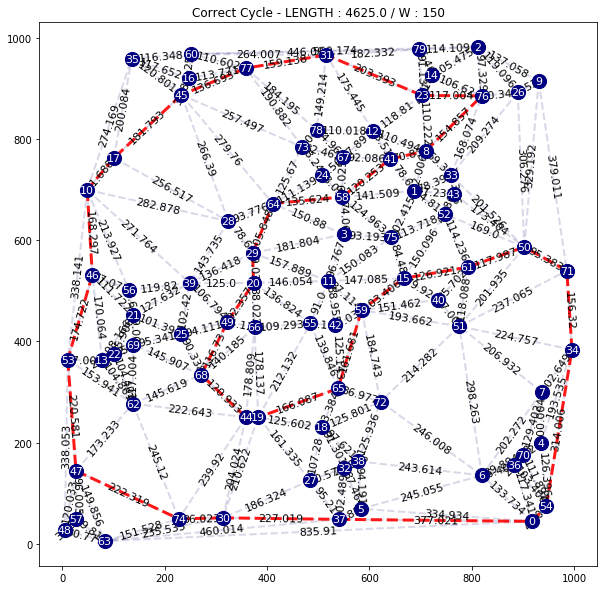

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


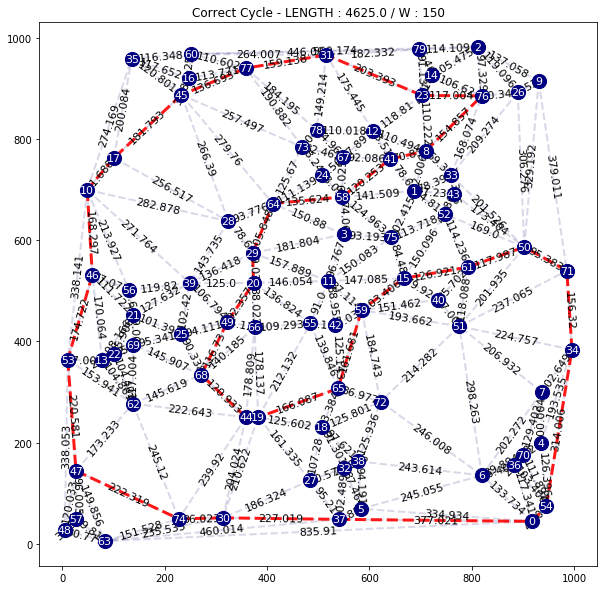

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


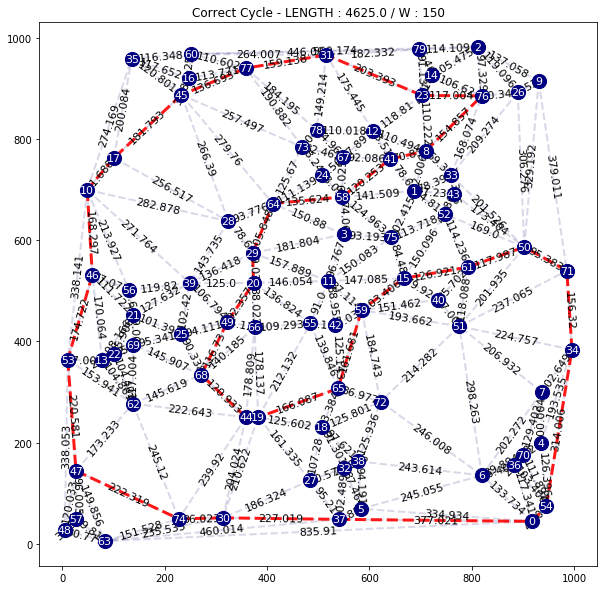

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


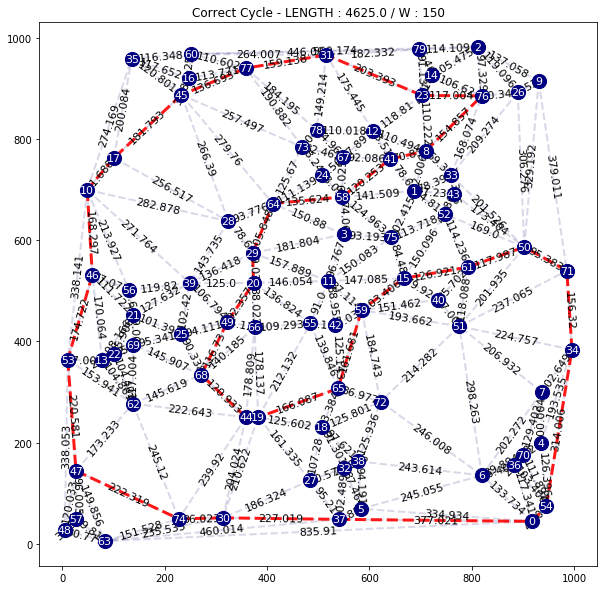

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


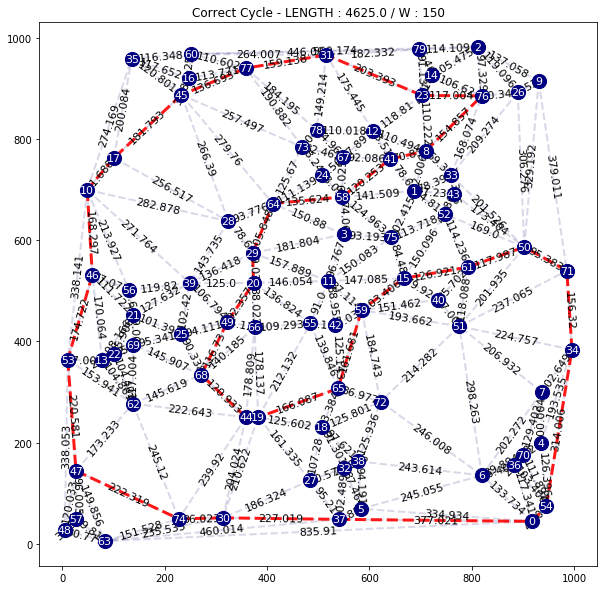

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


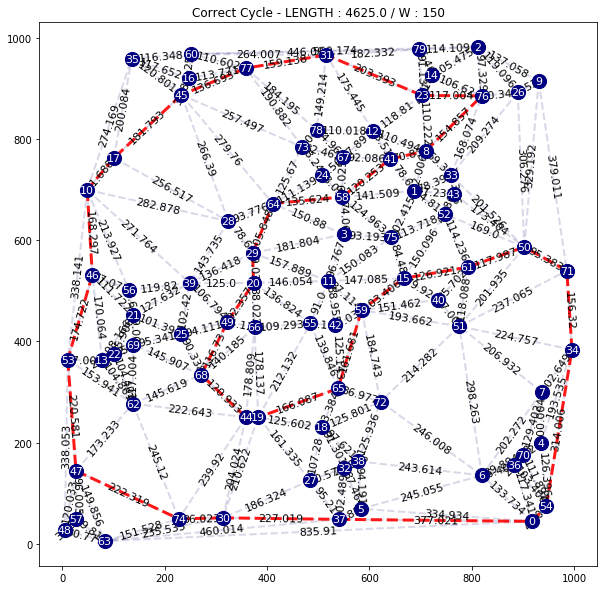

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


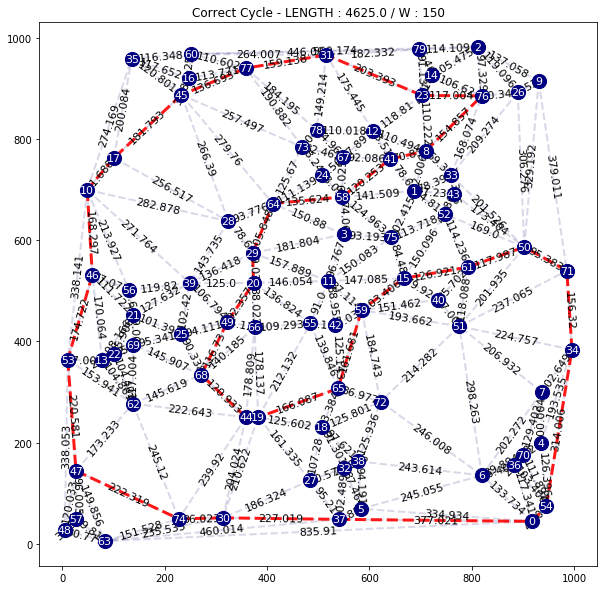

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


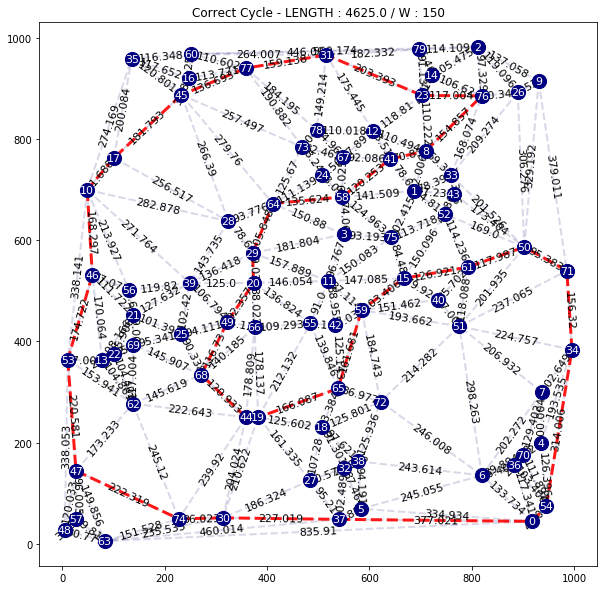

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


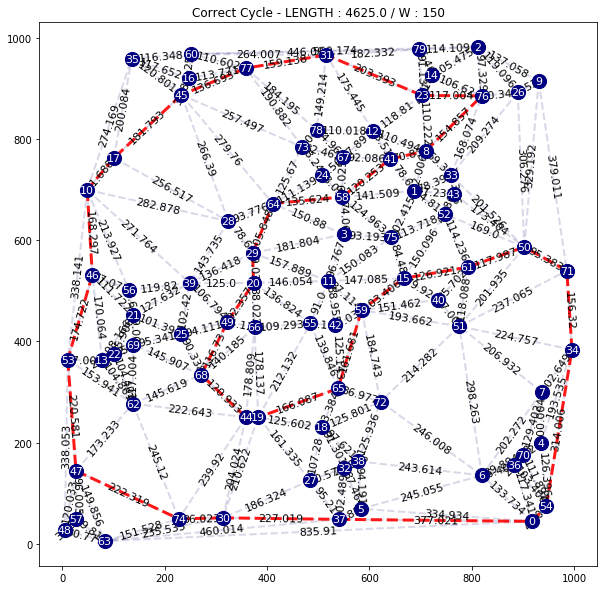

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]


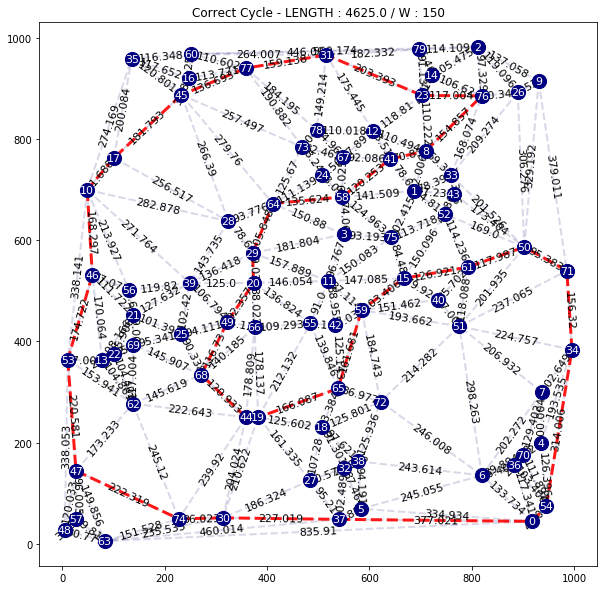

In [6]:
def get_cycle_score_with_plot(individual):
    
    node_pos = pos
    figsize = (20,20)
    
    # Preprocessing
    pos_node = {}
    points = []

    for i, n in enumerate(individual):
        if n == 1:
            points.append(node_pos[i])
            pos_node[tuple(node_pos[i])] = i

    points = np.array(points)
        
    if len(points) < 3:
        return -1
    
    hull = concaveHull(points, k=3)
    hull_nodes = [pos_node[tuple(h)] for h in hull]
    if hull_nodes[0] != hull_nodes[-1]:
        return -1

    hull_edges = []
    for i in range(len(hull_nodes)-1):
        hull_edges.append((hull_nodes[i], hull_nodes[i+1]))


    # Cycle tester
    cycle_visit = defaultdict(lambda: 0)
    cycle_nodes = []
    all_shortest_path_edges = []
    for n0, n1 in hull_edges:
        shortest_path = all_path[n0][n1]
        shortest_path_edges = []


        for i in range(len(shortest_path)-1):
            cycle_nodes.append(shortest_path[i])
            shortest_path_edges.append((shortest_path[i], shortest_path[i+1]))
            cycle_visit[shortest_path[i+1]] += 1

        cycle_visit[shortest_path[0]]  = 1
        cycle_visit[shortest_path[-1]] = 1
        cycle_nodes.append(shortest_path[-1])      

        # Drawing part
        all_shortest_path_edges += shortest_path_edges


    # 1. Is this true cycle?
    isCycle = True

    for k,v in cycle_visit.items():
        if v > 1: # duplicate visited node exist in cycle path
            isCycle = False


    # 2. all cycle nodes in 'w' threshold?
    cycle_nodes = list(set(cycle_nodes))

    isThres = True
    for i in range(P.shape[0]):
        inThres = False
        for cn in cycle_nodes:
            if P[i,cn] < w:
                inThres = True
                break

        if not inThres:
            isThres = False
            break


    # 3. Calculate length of Cycle
    cycle_length = 0
    for start, end in all_shortest_path_edges:
        cycle_length += P[start, end]
    
    
    if (cycle_length > 0) and isCycle and isThres:
        plt.figure(figsize=(10,10))
        nx.draw_networkx_nodes(G, node_pos, node_size=200,alpha=1,node_color='#000080')
        nx.draw_networkx_edges(G, node_pos, edgelist=G.edges, width=2, edge_color='#483D8B', alpha=0.2 ,style='dashed')
        nx.draw_networkx_labels(G, node_pos, font_size=11, font_family='sans-serif', alpha=1, font_color='white')
        nx.draw_networkx_edge_labels(G, node_pos, edge_labels=nx.get_edge_attributes(G,'weight'), font_color='black', font_size=11, bbox=dict(facecolor='white', alpha=0.001))
        nx.draw_networkx_edges(G, node_pos, edgelist = all_shortest_path_edges, width=3, edge_color='r', alpha=0.9 ,style='dashed')
        plt.title("Correct Cycle - LENGTH : {} / W : {}".format(cycle_length, w))
        plt.show()
        
        return [1/cycle_length]
    else:
        plt.figure(figsize=(10,10))
        nx.draw_networkx_nodes(G, node_pos, node_size=200,alpha=1,node_color='#000080')
        nx.draw_networkx_edges(G, node_pos, edgelist=G.edges, width=2, edge_color='#483D8B', alpha=0.2 ,style='dashed')
        nx.draw_networkx_labels(G, node_pos, font_size=11, font_family='sans-serif', alpha=1, font_color='white')
        nx.draw_networkx_edge_labels(G, node_pos, edge_labels=nx.get_edge_attributes(G,'weight'), font_color='black', font_size=11, bbox=dict(facecolor='white', alpha=0.001))
        nx.draw_networkx_edges(G, node_pos, edgelist = all_shortest_path_edges, width=3, edge_color='r', alpha=0.9 ,style='dashed')
        plt.title("Wrong Cycle - LENGTH : {} / W : {} / CYCLE : {} / THRES : {}".format(cycle_length, w, isCycle, isThres))
        plt.show()
        return [-1]
    
for score_node in best_score:
    print(score_node)
    get_cycle_score_with_plot(score_node)